# Linear Interpolation Using interp1d

In [31]:
import numpy as np
import math
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import time

# Sample data, 10 points from 0 to 2*pi
x_sample = np.linspace(0, 2 * math.pi, 10)
y_sample = np.sin(x_sample)
# Interpolation Function
linear_interp_func = interp1d(x_sample, y_sample, kind='linear', fill_value="extrapolate")

# Approximate Sin(x) with new x range for smoother plot
#intsead of starting at zero trying shifting step size by a half step 
hstep = (x_sample[1] - x_sample[0])/2
x_new = np.linspace(hstep,2* math.pi + hstep, 100)
start = time.perf_counter()
y_approx = linear_interp_func(x_new[:-1])
end = time.perf_counter()
#y_actual = np.sin(x_new[:-1])
#not finished look at photo taken of hankins explaining 
x_smooth = np.linspace(0,2*math.pi, 100)
y_true = np.sin(x_smooth)

# Error Testing - also find min error
abs_error = np.abs(y_true - y_approx)
mean_abs_err = np.mean(abs_error)
root_mean_squ_err = np.sqrt(np.mean((y_true - y_approx)**2))
max_error = np.max(abs_error)


In [69]:
# Sample data, 10 points from 0 to 2*pi
x_sample = np.linspace(0, 2 * math.pi, 10)
y_sample = np.sin(x_sample)

# Interpolation Function
linear_interp_func = interp1d(x_sample, y_sample, kind='linear', fill_value="extrapolate") 
# fill_value="extrapolate" to avoid going over interpolation range. I was struggling to get the ranges to cooperate

# Approximate Sin(x) with new x range for smoother plot
# Instead of starting at zero, try shifting the step size by a half step 
hstep = (x_sample[1] - x_sample[0])/2
x_new = np.linspace(hstep,2* math.pi + hstep, 100)

# Compute midpoints between sample points, just to estimate error at midpoints
x_mid = (x_sample[:-1] + x_sample[1:]) / 2
y_true_mid = np.sin(x_mid)
y_approx_mid = linear_interp_func(x_mid)
E = y_true_mid - y_approx_mid
formatted_E = np.array2string(E, precision=6, separator=', ')

# Approximate Sin(x) and time the compute
start = time.perf_counter()
y_approx = linear_interp_func(x_new)
end = time.perf_counter()
x_smooth = np.linspace(0,2*math.pi, 100)
y_true = np.sin(x_smooth)

# Error Testing - also find min error
abs_error = np.abs(y_true - y_approx)
mean_abs_err = np.mean(abs_error)
root_mean_squ_err = np.sqrt(np.mean((y_true - y_approx)**2))
max_error = np.max(abs_error)
min_error = np.min(abs_error)

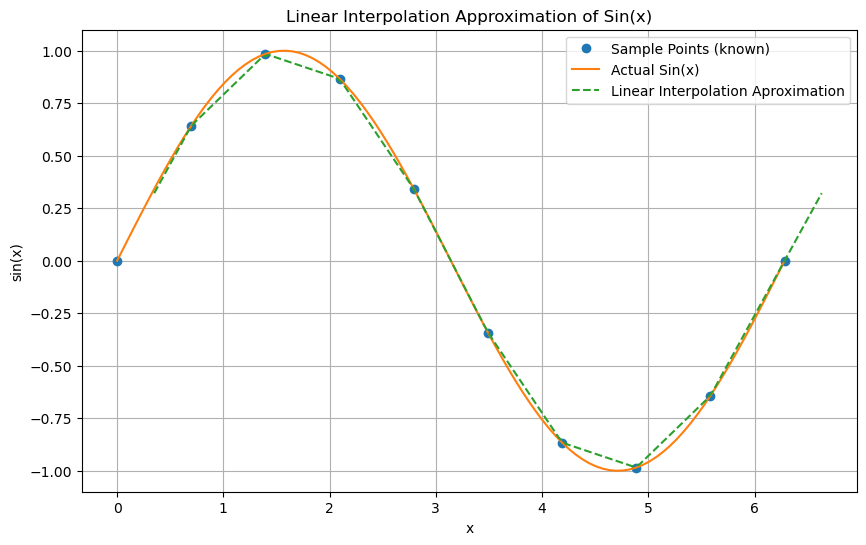

Time for one call: 0.00026340 seconds
Mean Absolute Error: 2.191461e-01
Root Mean Square Error: 2.435180e-01
Max Absolute Error: 3.446815e-01
Min Absolute Error: 6.061091e-04
y_true - y_approx = [ 2.062634e-02,  5.222772e-02,  5.939117e-02,  3.876484e-02,  1.144238e-17,
 -3.876484e-02, -5.939117e-02, -5.222772e-02, -2.062634e-02]


In [70]:
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(x_sample, y_sample, 'o', label= 'Sample Points (known)')
plt.plot(x_smooth, y_true, '-', label= 'Actual Sin(x)')
plt.plot(x_new, y_approx, '--', label= 'Linear Interpolation Aproximation')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Linear Interpolation Approximation of Sin(x)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Time for one call: {end - start:.8f} seconds")
print(f"Mean Absolute Error: {mean_abs_err:.6e}")
print(f"Root Mean Square Error: {root_mean_squ_err:.6e}")
print(f"Max Absolute Error: {max_error:.6e}")
print(f"Min Absolute Error: {min_error:.6e}")
print(f"y_true - y_approx = {formatted_E}")

In the graph, the dots show the sample point data, and you can see the Linear Interpolation Approximation following these sample points. It is connecting the data points that approximate the value of an unknown point between those two points. The line is the simplest way to find a decent enough estimate for the missing data between points. If you want a more precise approximation, you would need many more sample points to make the estimation between each point smaller, so the percent error would be smaller. The more data you use the more precise it will be.